<a href="https://colab.research.google.com/github/Akomaasi/US-Cancer-Death-Rate-Regression/blob/main/Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
cancer_df = pd.read_csv("cancer_reg.csv")
geo_df = pd.read_csv("avg-household-size.csv")

In [8]:
cancer_df

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [9]:
geo_df

,statefips,countyfips,avghouseholdsize,geography
0,2,13,2.43,"Aleutians East Borough, Alaska"
1,2,16,3.59,"Aleutians West Census Area, Alaska"
2,2,20,2.77,"Anchorage Municipality, Alaska"
3,2,50,3.86,"Bethel Census Area, Alaska"
4,2,60,2.50,"Bristol Bay Borough, Alaska"
...,...,...,...,...
3215,56,37,2.64,"Sweetwater County, Wyoming"
3216,56,39,2.63,"Teton County, Wyoming"
3217,56,41,2.76,"Uinta County, Wyoming"
3218,56,43,2.34,"Washakie County, Wyoming"


In [10]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

In [11]:
merged_df = pd.merge(cancer_df, geo_df, on='geography', how='outer')

In [12]:
merged_df.shape

(3220, 36)

In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   float64
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   float64
 5   popest2015               3047 non-null   float64
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3220 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

In [14]:
merged_df.isnull().sum()

,0
avganncount,173
avgdeathsperyear,173
target_deathrate,173
incidencerate,173
medincome,173
popest2015,173
povertypercent,173
studypercap,173
binnedinc,173
medianage,173


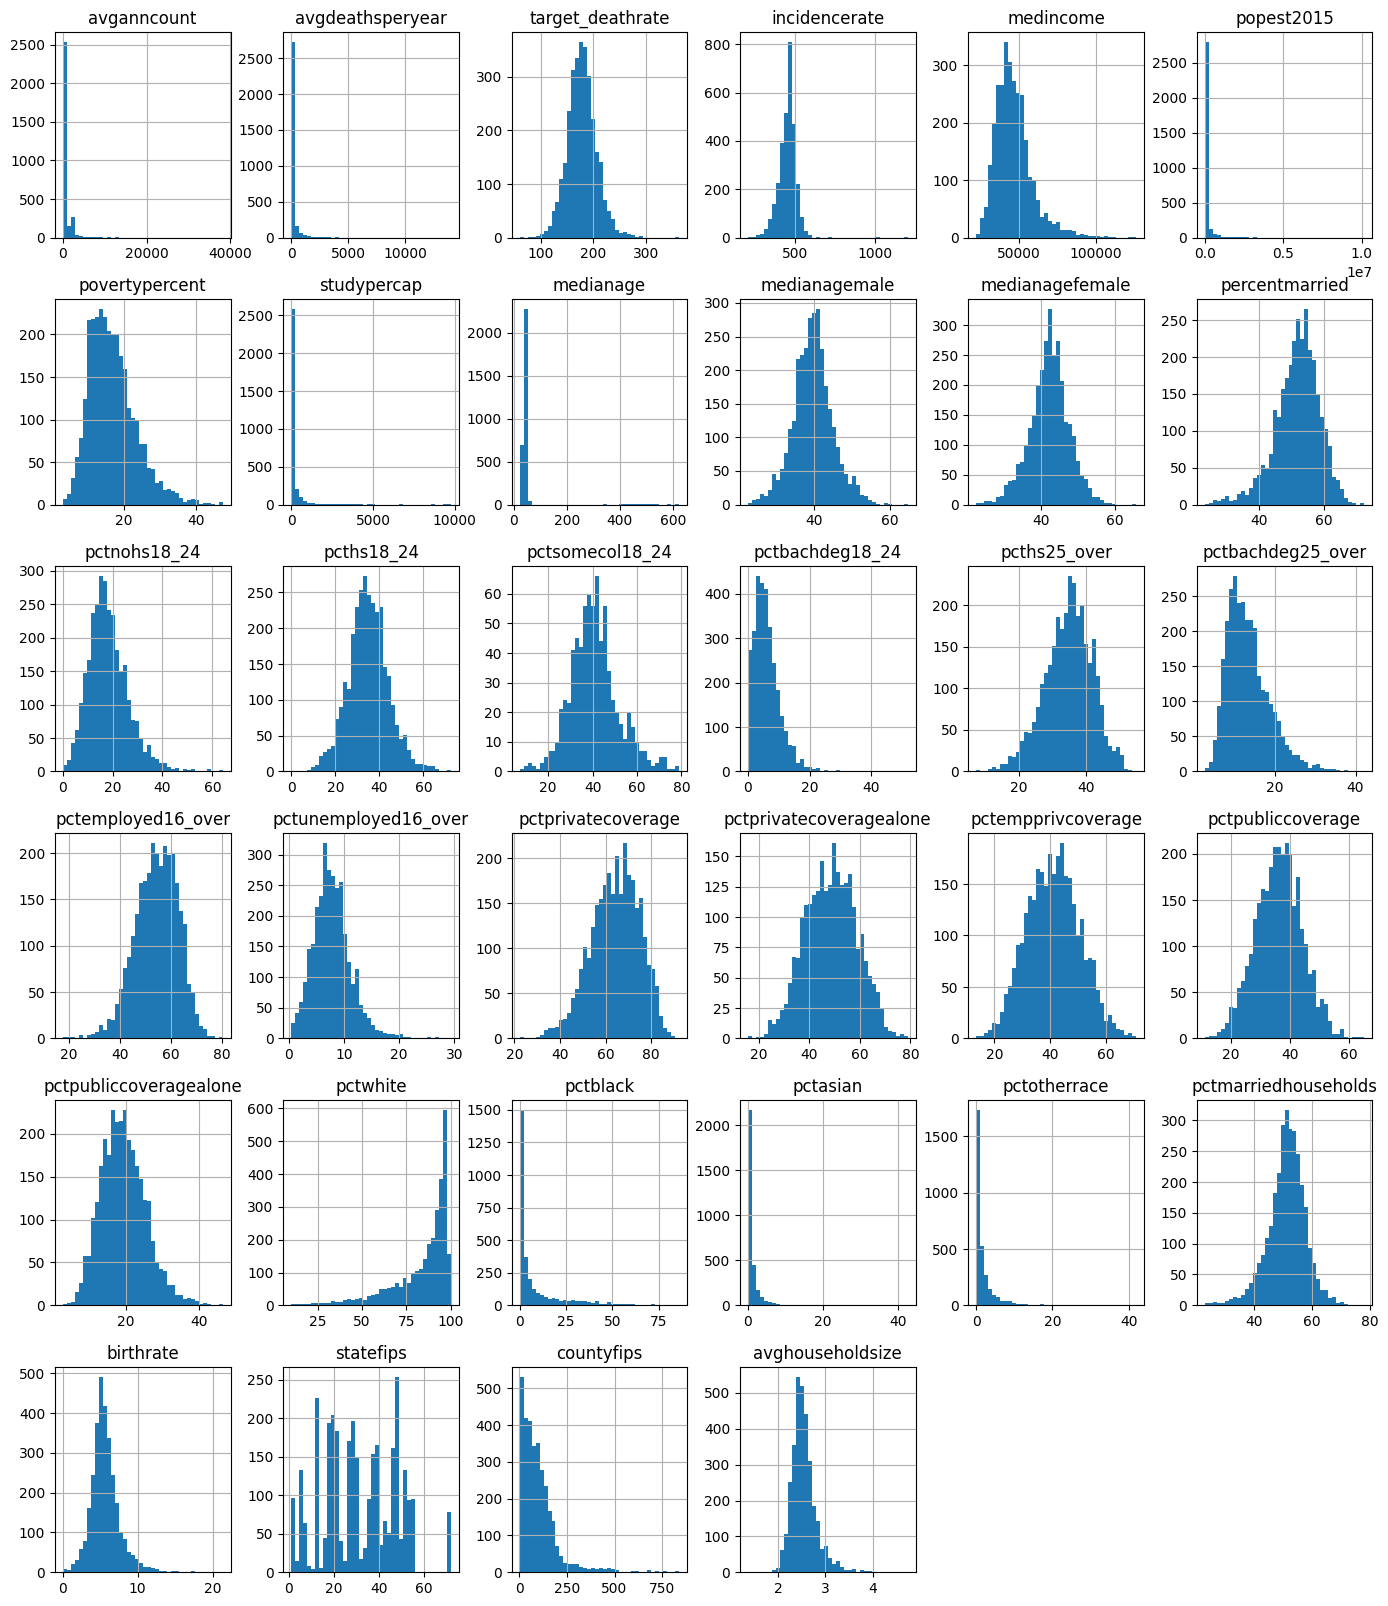

In [15]:
merged_df.hist(figsize=(17,20),bins=40)
plt.show()

In [16]:
# 'avganncount' -> np.log -> Standardscaler
# 'avgdeathsperyear' -> np.log -> Standardscaler
# 'target_deathrate' <Target>
# 'incidencerate'
#  'medincome'
# 'popest2015'
#  'povertypercent'
#  'studypercap'
#  'binnedinc'
#  'medianage'
#  'medianagemale'
#  'medianagefemale'
#  'geography'
#  'percentmarried'
#  'pctnohs18_24'
#  'pcths18_24'
#  'pctsomecol18_24'
#  'pctbachdeg18_24'
#  'pcths25_over'
#  'pctbachdeg25_over'
#  'pctemployed16_over'
#  'pctunemployed16_over'
#  'pctprivatecoverage'
#  'pctprivatecoveragealone'
#  'pctempprivcoverage'
#   'pctpubliccoverage'
# 'pctpubliccoveragealone'
#  'pctwhite' -> Quantile (Rank) -> Standardscaler
#   'pctblack'
#    'pctasian'
#  'pctotherrace'
#  'pctmarriedhouseholds'
#  'birthrate'
#  'statefips'
# 'countyfips'
#  'avghouseholdsize'

<Axes: >

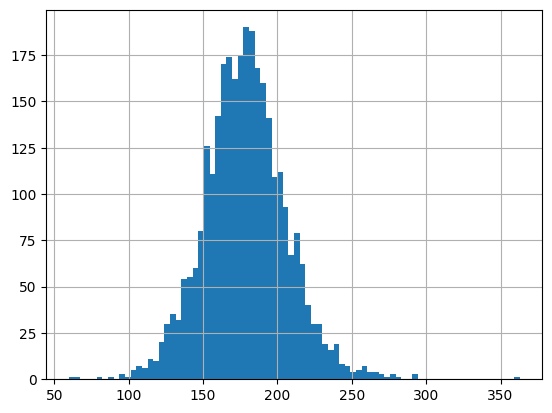

In [17]:
merged_df['target_deathrate'].hist(bins=80)

In [18]:
merged_df["binnedinc"].value_counts()

,count
binnedinc,
"[22640, 34218.1]",306
"(54545.6, 61494.5]",306
"(45201, 48021.6]",306
"(51046.4, 54545.6]",305
"(42724.4, 45201]",305
"(48021.6, 51046.4]",305
"(37413.8, 40362.7]",304
"(34218.1, 37413.8]",304
"(40362.7, 42724.4]",304


In [19]:
merged_df['sum_of_races']=merged_df[['pctwhite','pctblack','pctasian','pctotherrace']].sum(axis=1)
merged_df['sum_of_edus']=merged_df[['pctnohs18_24','pcths18_24','pctsomecol18_24','pctbachdeg18_24']].sum(axis=1)

In [20]:
merged_df.columns

Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'binnedinc',
       'medianage', 'medianagemale', 'medianagefemale', 'geography',
       'percentmarried', 'pctnohs18_24', 'pcths18_24', 'pctsomecol18_24',
       'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over',
       'pctemployed16_over', 'pctunemployed16_over', 'pctprivatecoverage',
       'pctprivatecoveragealone', 'pctempprivcoverage', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'pctmarriedhouseholds', 'birthrate', 'statefips',
       'countyfips', 'avghouseholdsize', 'sum_of_races', 'sum_of_edus'],
      dtype='object')

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_set, test_set = train_test_split(merged_df , test_size=0.2, random_state=40)

In [23]:
train_set

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,statefips,countyfips,avghouseholdsize,sum_of_races,sum_of_edus
3115,158.000000,72.0,203.7,459.900000,35400.0,26521.0,21.9,0.000000,"(34218.1, 37413.8]",42.5,...,1.729392,0.022855,0.064757,55.071421,5.225066,47,185,2.65,97.626847,66.7
2091,64.000000,16.0,146.9,572.800000,82596.0,10925.0,7.1,0.000000,"(61494.5, 125635]",39.5,...,9.425919,1.136794,1.913604,44.940097,4.179364,25,19,2.62,98.181129,54.2
2693,1007.000000,382.0,157.5,429.600000,45363.0,222936.0,18.1,529.299889,"(45201, 48021.6]",36.1,...,17.936861,1.499412,1.954016,50.163751,5.875929,48,423,2.70,98.075403,52.4
582,1962.667684,23.0,184.9,453.549422,43674.0,8803.0,17.8,0.000000,"(42724.4, 45201]",42.5,...,0.251371,0.422761,0.045704,55.393001,7.495430,27,29,2.48,87.488574,99.9
1919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,48,311,2.80,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,153.000000,67.0,155.4,373.800000,39126.0,36380.0,18.7,0.000000,"(37413.8, 40362.7]",32.8,...,0.741953,2.921440,0.234588,46.683618,5.373954,26,61,2.51,97.515003,37.7
3064,157.000000,65.0,205.6,482.800000,41093.0,29534.0,25.5,0.000000,"(40362.7, 42724.4]",37.3,...,20.897956,0.103175,2.090128,51.619313,5.499843,13,305,2.77,97.450576,59.2
2213,165.000000,60.0,193.7,541.300000,40235.0,23058.0,20.4,1778.124729,"(37413.8, 40362.7]",42.5,...,0.791943,0.279762,0.167857,51.593011,4.211870,26,133,2.60,97.813549,64.9
2055,221.000000,89.0,187.8,486.500000,46406.0,34828.0,15.1,0.000000,"(45201, 48021.6]",41.0,...,5.986507,0.552250,0.116713,49.077758,4.011231,17,137,2.29,97.830852,49.6


In [24]:
test_set

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,statefips,countyfips,avghouseholdsize,sum_of_races,sum_of_edus
2244,107.000000,33.0,151.3,499.400000,43097.0,12781.0,17.9,0.000000,"(42724.4, 45201]",49.8,...,19.034047,0.261901,1.209367,55.413405,5.096661,37,137,2.36,95.701741,57.4
2225,1962.667684,148.0,156.9,453.549422,51510.0,57716.0,11.2,346.524361,"(51046.4, 54545.6]",46.7,...,1.225852,0.605102,0.652049,57.037684,7.511606,27,111,2.34,98.379440,57.0
1846,181.000000,70.0,188.8,517.200000,42088.0,28880.0,18.0,0.000000,"(40362.7, 42724.4]",39.7,...,5.624133,0.849515,0.117892,46.553108,4.673183,29,127,2.43,97.621359,100.1
401,102.000000,38.0,155.9,433.100000,47340.0,20479.0,15.7,0.000000,"(45201, 48021.6]",35.1,...,0.654657,0.649878,2.738090,52.680174,8.165883,49,7,2.61,96.463898,43.6
739,13.000000,6.0,197.5,444.000000,47376.0,1760.0,10.8,0.000000,"(45201, 48021.6]",50.3,...,0.000000,0.170648,0.910125,48.152425,7.560137,30,19,1.99,99.260523,58.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,72,3,3.09,0.000000,0.0
1274,499.000000,215.0,190.0,457.800000,40921.0,79545.0,20.2,0.000000,"(40362.7, 42724.4]",43.4,...,6.803685,0.592285,1.157993,55.248489,5.769696,48,213,2.61,97.864989,65.0
1351,696.000000,273.0,177.4,459.500000,40581.0,135727.0,21.0,7.367731,"(40362.7, 42724.4]",37.4,...,1.270791,2.638595,3.561325,40.608266,5.240579,6,23,2.47,88.799117,100.0
804,26.000000,12.0,126.0,320.200000,51817.0,5104.0,11.7,0.000000,"(51046.4, 54545.6]",43.2,...,1.482194,0.346487,0.365736,58.630394,12.011439,38,21,2.30,98.556304,44.8


In [25]:
train_set.corr(numeric_only=True)

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,statefips,countyfips,avghouseholdsize,sum_of_races,sum_of_edus
avganncount,1.000000,0.940661,-0.132365,0.071285,0.264760,0.927829,-0.130833,0.075822,-0.017534,-0.121371,...,0.031534,0.465519,0.237133,-0.107118,-0.035375,-0.088416,-0.057158,0.090643,0.012328,-0.040017
avgdeathsperyear,0.940661,1.000000,-0.079857,0.060972,0.218555,0.976879,-0.062422,0.060876,-0.021109,-0.144815,...,0.084764,0.472133,0.242410,-0.159455,-0.073541,-0.055354,-0.055453,0.129712,0.011318,-0.044698
target_deathrate,-0.132365,-0.079857,1.000000,0.452441,-0.428352,-0.109617,0.435010,-0.020588,0.020741,-0.029141,...,0.257219,-0.172377,-0.193721,-0.293201,-0.067786,-0.047042,0.070805,-0.031372,-0.067007,0.066001
incidencerate,0.071285,0.060972,0.452441,1.000000,-0.012124,0.026002,0.026735,0.073276,0.028550,-0.021576,...,0.110017,-0.004687,-0.202170,-0.148725,-0.104786,-0.067135,0.010734,-0.137203,0.072894,-0.011659
medincome,0.264760,0.218555,-0.428352,-0.012124,1.000000,0.230375,-0.788581,0.031628,-0.009484,-0.088362,...,-0.263480,0.433029,0.091159,0.438471,-0.019147,0.054648,-0.046627,0.154124,0.032900,-0.065482
popest2015,0.927829,0.976879,-0.109617,0.026002,0.230375,1.000000,-0.060163,0.052543,-0.022424,-0.172093,...,0.072639,0.496659,0.269702,-0.126608,-0.056423,-0.051899,-0.045625,0.167822,0.002297,-0.035462
povertypercent,-0.130833,-0.062422,0.435010,0.026735,-0.788581,-0.060163,1.000000,-0.048215,-0.038340,-0.223690,...,0.507539,-0.156115,0.045019,-0.606081,-0.010241,-0.106115,0.082860,0.145079,-0.145688,0.039968
studypercap,0.075822,0.060876,-0.020588,0.073276,0.031628,0.052543,-0.048215,1.000000,-0.020462,-0.020624,...,-0.017549,0.055054,-0.029190,-0.055511,0.008929,0.007819,-0.002338,-0.040054,0.025240,-0.061106
medianage,-0.017534,-0.021109,0.020741,0.028550,-0.009484,-0.022424,-0.038340,-0.020462,1.000000,0.132765,...,-0.036398,-0.036956,-0.037396,0.022957,-0.014492,0.027075,-0.027795,-0.086409,0.006757,-0.000860
medianagemale,-0.121371,-0.144815,-0.029141,-0.021576,-0.088362,-0.172093,-0.223690,-0.020624,0.132765,1.000000,...,-0.250522,-0.253318,-0.267716,0.236612,-0.092523,0.040765,-0.128447,-0.584166,0.184808,0.091250


In [26]:
# qt = QuantileTransformer(output_distribution='normal', random_state=0)
# data = train_set[['pctwhite']].to_numpy().reshape(-1,1)
# transformed = qt.fit_transform(data)
# train_set['pctwhite_qt'] = transformed
# train_set['pctwhite_qt'].hist(bins=80)

<Axes: >

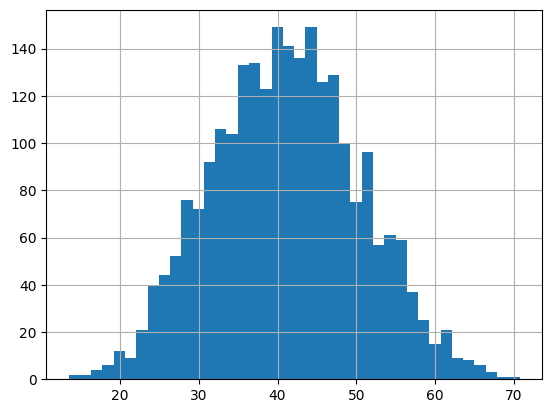

In [27]:
train_set['pctempprivcoverage'].hist(bins=40)

In [28]:
train_features= train_set.drop('target_deathrate',axis=1)
train_target= train_set['target_deathrate']
test_features= test_set.drop('target_deathrate',axis=1)
test_target= test_set["target_deathrate"]

In [29]:
train_features

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,...,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,statefips,countyfips,avghouseholdsize,sum_of_races,sum_of_edus
3115,158.000000,72.0,459.900000,35400.0,26521.0,21.9,0.000000,"(34218.1, 37413.8]",42.5,40.9,...,1.729392,0.022855,0.064757,55.071421,5.225066,47,185,2.65,97.626847,66.7
2091,64.000000,16.0,572.800000,82596.0,10925.0,7.1,0.000000,"(61494.5, 125635]",39.5,38.0,...,9.425919,1.136794,1.913604,44.940097,4.179364,25,19,2.62,98.181129,54.2
2693,1007.000000,382.0,429.600000,45363.0,222936.0,18.1,529.299889,"(45201, 48021.6]",36.1,34.5,...,17.936861,1.499412,1.954016,50.163751,5.875929,48,423,2.70,98.075403,52.4
582,1962.667684,23.0,453.549422,43674.0,8803.0,17.8,0.000000,"(42724.4, 45201]",42.5,41.5,...,0.251371,0.422761,0.045704,55.393001,7.495430,27,29,2.48,87.488574,99.9
1919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,48,311,2.80,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,153.000000,67.0,373.800000,39126.0,36380.0,18.7,0.000000,"(37413.8, 40362.7]",32.8,28.8,...,0.741953,2.921440,0.234588,46.683618,5.373954,26,61,2.51,97.515003,37.7
3064,157.000000,65.0,482.800000,41093.0,29534.0,25.5,0.000000,"(40362.7, 42724.4]",37.3,36.7,...,20.897956,0.103175,2.090128,51.619313,5.499843,13,305,2.77,97.450576,59.2
2213,165.000000,60.0,541.300000,40235.0,23058.0,20.4,1778.124729,"(37413.8, 40362.7]",42.5,41.5,...,0.791943,0.279762,0.167857,51.593011,4.211870,26,133,2.60,97.813549,64.9
2055,221.000000,89.0,486.500000,46406.0,34828.0,15.1,0.000000,"(45201, 48021.6]",41.0,39.1,...,5.986507,0.552250,0.116713,49.077758,4.011231,17,137,2.29,97.830852,49.6


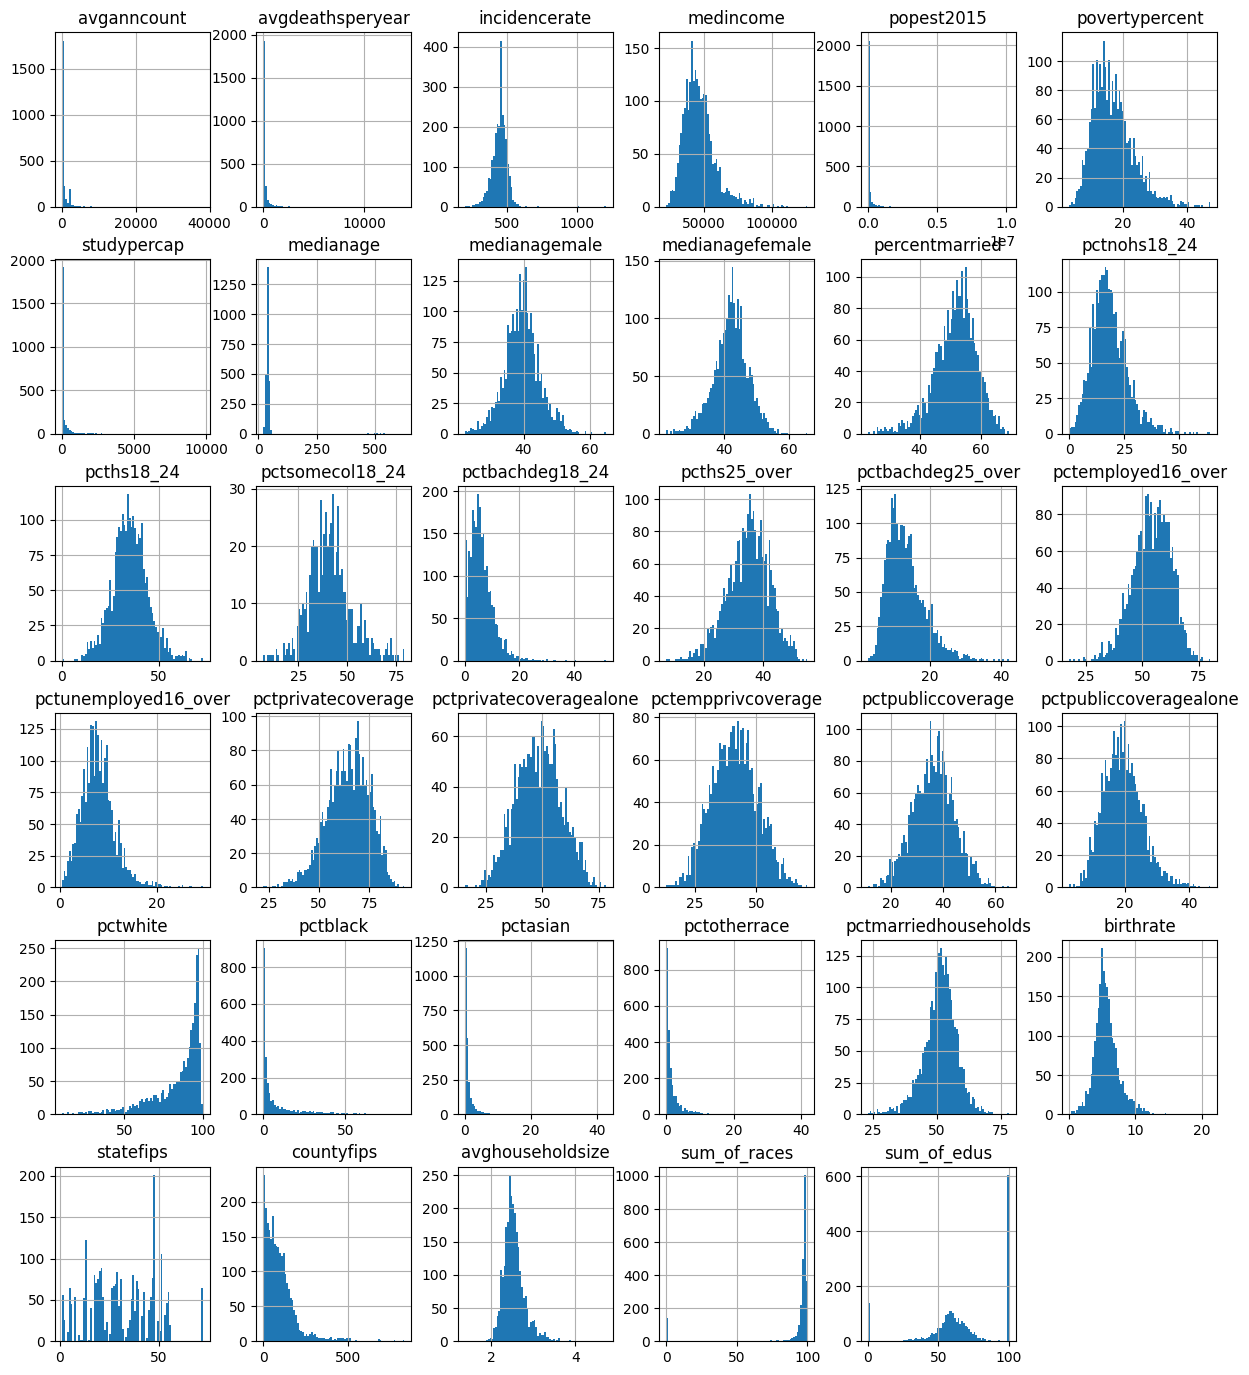

In [30]:
train_features.hist(bins=80,figsize=(15,17))
plt.show()

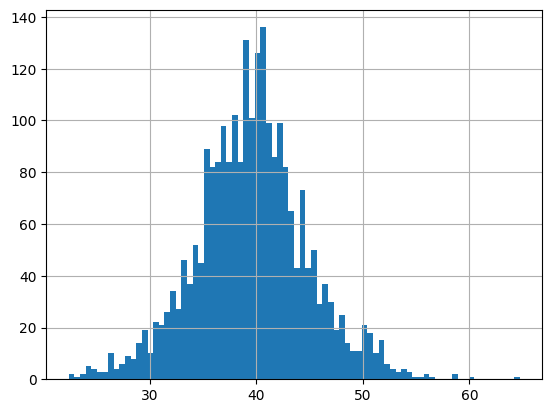

In [31]:
train_features['medianagemale'].hist(bins=80)
plt.show()

In [32]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [33]:
right_skewed_pipeline= make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log1p,
                        feature_names_out="one-to-one",
                        validate=True),
    StandardScaler()
)

In [34]:
ohe_categorical_features_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown='ignore')
)


In [35]:
train_features['binnedinc'].value_counts()

,count
binnedinc,
"(48021.6, 51046.4]",252
"(37413.8, 40362.7]",250
"(40362.7, 42724.4]",249
"[22640, 34218.1]",249
"(45201, 48021.6]",247
"(42724.4, 45201]",240
"(51046.4, 54545.6]",239
"(54545.6, 61494.5]",238
"(34218.1, 37413.8]",237


In [36]:
ord_categorical_features_pipeline= make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder(categories=[['[22640, 34218.1]',
                               '(34218.1, 37413.8]',
                               '(37413.8, 40362.7]',
                               '(40362.7, 42724.4]',
                               '(42724.4, 45201]',
                               '(45201, 48021.6]',
                               '(48021.6, 51046.4]',
                               '(51046.4, 54545.6]',
                               '(54545.6, 61494.5]',
                               '(61494.5, 125635]',]])
)

In [37]:
left_skewed_pipeline= make_pipeline(
    SimpleImputer(strategy="median"),
    QuantileTransformer(output_distribution='normal', random_state=0)
)

In [38]:
normal_dist_pipeline= make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [39]:
sum_columns_pipeline= make_pipeline(
    SimpleImputer(strategy='median')
)

In [40]:
from sklearn.compose import ColumnTransformer

In [41]:
train_features[['avganncount','popest2015','incidencerate']]

,avganncount,popest2015,incidencerate
3115,158.000000,26521.0,459.900000
2091,64.000000,10925.0,572.800000
2693,1007.000000,222936.0,429.600000
582,1962.667684,8803.0,453.549422
1919,NaN,NaN,NaN
...,...,...,...
1330,153.000000,36380.0,373.800000
3064,157.000000,29534.0,482.800000
2213,165.000000,23058.0,541.300000
2055,221.000000,34828.0,486.500000


In [42]:
train_features

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,...,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,statefips,countyfips,avghouseholdsize,sum_of_races,sum_of_edus
3115,158.000000,72.0,459.900000,35400.0,26521.0,21.9,0.000000,"(34218.1, 37413.8]",42.5,40.9,...,1.729392,0.022855,0.064757,55.071421,5.225066,47,185,2.65,97.626847,66.7
2091,64.000000,16.0,572.800000,82596.0,10925.0,7.1,0.000000,"(61494.5, 125635]",39.5,38.0,...,9.425919,1.136794,1.913604,44.940097,4.179364,25,19,2.62,98.181129,54.2
2693,1007.000000,382.0,429.600000,45363.0,222936.0,18.1,529.299889,"(45201, 48021.6]",36.1,34.5,...,17.936861,1.499412,1.954016,50.163751,5.875929,48,423,2.70,98.075403,52.4
582,1962.667684,23.0,453.549422,43674.0,8803.0,17.8,0.000000,"(42724.4, 45201]",42.5,41.5,...,0.251371,0.422761,0.045704,55.393001,7.495430,27,29,2.48,87.488574,99.9
1919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,48,311,2.80,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,153.000000,67.0,373.800000,39126.0,36380.0,18.7,0.000000,"(37413.8, 40362.7]",32.8,28.8,...,0.741953,2.921440,0.234588,46.683618,5.373954,26,61,2.51,97.515003,37.7
3064,157.000000,65.0,482.800000,41093.0,29534.0,25.5,0.000000,"(40362.7, 42724.4]",37.3,36.7,...,20.897956,0.103175,2.090128,51.619313,5.499843,13,305,2.77,97.450576,59.2
2213,165.000000,60.0,541.300000,40235.0,23058.0,20.4,1778.124729,"(37413.8, 40362.7]",42.5,41.5,...,0.791943,0.279762,0.167857,51.593011,4.211870,26,133,2.60,97.813549,64.9
2055,221.000000,89.0,486.500000,46406.0,34828.0,15.1,0.000000,"(45201, 48021.6]",41.0,39.1,...,5.986507,0.552250,0.116713,49.077758,4.011231,17,137,2.29,97.830852,49.6


In [43]:
def ratio_of_columns(X):
    X = np.array(X, dtype=float)
    num = X[:, [0]]
    den = X[:, [1]]
    den_safe = np.where(den == 0, np.nan, den)
    with np.errstate(divide='ignore', invalid='ignore'):
        ratio = num / den_safe
    ratio = np.where(np.isfinite(ratio), ratio, np.nan)
    return ratio
def ratio_of_columns_name(transformer, feature_names_in):
    return ["ratio"]
def ratio_of_columns_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(ratio_of_columns,
                            feature_names_out=ratio_of_columns_name,
                            validate=False),
        SimpleImputer(strategy="median"),
        StandardScaler()
    )

In [44]:
def multiply_of_columns(X):
  return X[:,[0]]*X[:,[1]]
def multiply_of_columns_name(function_transformer,feature_names_in):
  return ['multiply']
def multiply_of_columns_pipline():
  return make_pipeline(
      SimpleImputer(strategy="median"),
      FunctionTransformer(multiply_of_columns,feature_names_out=multiply_of_columns_name),
      StandardScaler()
  )

In [45]:
all_transformations = ColumnTransformer([
    ('sum_columns',sum_columns_pipeline,['sum_of_races','sum_of_edus']),
    ('white',ratio_of_columns_pipeline(),['pctwhite','sum_of_races']),
    ('black',ratio_of_columns_pipeline(),['pctblack','sum_of_races']),
    ('asian',ratio_of_columns_pipeline(),['pctasian','sum_of_races']),
    ('otherraces',ratio_of_columns_pipeline(),['pctotherrace','sum_of_races']),
    ('nohs18_24',ratio_of_columns_pipeline(),['pctnohs18_24','sum_of_edus']),
    ('canser_per_population',ratio_of_columns_pipeline(),['avganncount','popest2015']),
    ('nohs_poverty',multiply_of_columns_pipline(),['pctnohs18_24','povertypercent']),
    ('log',right_skewed_pipeline,['avganncount','avgdeathsperyear','incidencerate',
                                  'medincome','popest2015', 'povertypercent', 'studypercap',
                                  'medianage','medianagefemale', 'percentmarried',
                                  'pctnohs18_24','pcths18_24', 'pctsomecol18_24', 'pctbachdeg18_24',
                                  'pctbachdeg25_over','pctunemployed16_over', 'pctpubliccoveragealone',
                                  'pctblack','pctasian','pctotherrace','pctmarriedhouseholds','birthrate','avghouseholdsize']),
    ('ord',ord_categorical_features_pipeline,['binnedinc']),
    ('ohe',ohe_categorical_features_pipeline,['geography']),
    ('leftskewed',left_skewed_pipeline,['pcths25_over','pctemployed16_over','pctprivatecoverage','pctwhite']),
    ('normal',normal_dist_pipeline,['medianagemale','pctprivatecoveragealone','pctempprivcoverage','pctpubliccoverage'])
])

In [46]:
train_features_transformed = all_transformations.fit_transform(train_features)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
linear_regression_pipeline = Pipeline([
    ('preprocess',all_transformations),
    ('model',LinearRegression())
])

In [49]:
mask = ~train_target.isna()
train_features = train_features[mask]
train_target = train_target[mask]

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [51]:
cv_scores_rmse = np.sqrt(-cross_val_score(
    linear_regression_pipeline, train_features, train_target, cv=5, scoring='neg_mean_squared_error'))
print("CV RMSE:", cv_scores_rmse.mean())


CV RMSE: 14.147745099032331


In [52]:
train_target.describe()

,target_deathrate
count,2436.000000
mean,178.409606
std,27.866747
min,59.700000
25%,160.950000
50%,178.000000
75%,194.400000
max,362.800000


In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
randomforrest_regressor_pipeline = Pipeline([
    ('preprocess',all_transformations),
    ('model',RandomForestRegressor())
])

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
param_grid ={'model__max_depth':range(99,106)}

In [57]:
gs = GridSearchCV(randomforrest_regressor_pipeline ,
                  param_grid ,
                  scoring='neg_mean_absolute_error',
                  cv=3,
                  verbose=2,
                  n_jobs=-1,
                  error_score='raise')

In [58]:
gs.fit(train_features , train_target)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('sum_columns',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['sum_of_races',
                                                                          'sum_of_edus']),
                                                                        ('white',
                                                                         Pipeline(steps=[('simpleimputer-1',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(fea...
                                                                          'pctwhite']),
                                                                        ('normal',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['medianagemale',
                                                                          'pctprivatecoveragealone',
                                                                          'pctempprivcoverage',
                                                                          'pctpubliccoverage'])])),
                                       ('model', RandomForestRegressor())]),
             n_jobs=-1, param_grid={'model__max_depth': range(99, 106)},
             scoring='neg_mean_absolute_error', verbose=2)

In [59]:
gs.best_params_

{'model__max_depth': 99}

In [60]:
pd.DataFrame(gs.cv_results_).sort_values(by='mean_test_score',
                                         ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,32.592911,1.509116,0.117646,0.010533,99,{'model__max_depth': 99},-13.408435,-13.736397,-14.299001,-13.814611,0.367755,1
4,34.586449,3.852447,0.127095,0.010443,103,{'model__max_depth': 103},-13.465885,-13.896346,-14.142967,-13.835066,0.279793,2
2,31.483095,0.646460,0.135060,0.012686,101,{'model__max_depth': 101},-13.610549,-13.733132,-14.195203,-13.846295,0.251740,3
5,33.890535,4.661140,0.106665,0.001735,104,{'model__max_depth': 104},-13.646124,-13.907400,-14.047565,-13.867030,0.166355,4
6,27.494225,4.580433,0.096205,0.017704,105,{'model__max_depth': 105},-13.641166,-13.828615,-14.221373,-13.897051,0.241761,5
3,30.551712,0.163057,0.108953,0.006281,102,{'model__max_depth': 102},-13.647916,-13.866368,-14.207390,-13.907225,0.230224,6
1,30.604019,0.195087,0.136751,0.046685,100,{'model__max_depth': 100},-13.700792,-13.831145,-14.191342,-13.907760,0.207465,7


In [61]:
canser_model = gs.best_estimator_

In [62]:
canser_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('sum_columns',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['sum_of_races',
                                                   'sum_of_edus']),
                                                 ('white',
                                                  Pipeline(steps=[('simpleimputer-1',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_of_columns_name at 0...
                                                                   QuantileTransformer(output_distribution='normal',
                                                                                       random_state=0))]),
                                                  ['pcths25_over',
                                                   'pctemployed16_over',
                                                   'pctprivatecoverage',
                                                   'pctwhite']),
                                                 ('normal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['medianagemale',
                                                   'pctprivatecoveragealone',
                                                   'pctempprivcoverage',
                                                   'pctpubliccoverage'])])),
                ('model', RandomForestRegressor(max_depth=99))])

In [63]:
canser_model['model'].feature_importances_.round(3)

array([0.015, 0.009, 0.008, ..., 0.007, 0.008, 0.009])

In [64]:
sorted(zip(canser_model['model'].feature_importances_.round(3),
    canser_model['preprocess'].get_feature_names_out()), reverse=True)

[(np.float64(0.205), 'log__pctbachdeg25_over'),
 (np.float64(0.201), 'log__incidencerate'),
 (np.float64(0.042), 'log__medincome'),
 (np.float64(0.042), 'leftskewed__pcths25_over'),
 (np.float64(0.034), 'leftskewed__pctprivatecoverage'),
 (np.float64(0.032), 'log__avgdeathsperyear'),
 (np.float64(0.027), 'log__povertypercent'),
 (np.float64(0.027), 'log__pctpubliccoveragealone'),
 (np.float64(0.023), 'log__pctunemployed16_over'),
 (np.float64(0.02), 'canser_per_population__ratio'),
 (np.float64(0.016), 'log__avghouseholdsize'),
 (np.float64(0.016), 'leftskewed__pctemployed16_over'),
 (np.float64(0.015), 'sum_columns__sum_of_races'),
 (np.float64(0.015), 'log__pctmarriedhouseholds'),
 (np.float64(0.015), 'log__pcths18_24'),
 (np.float64(0.013), 'log__popest2015'),
 (np.float64(0.013), 'log__pctbachdeg18_24'),
 (np.float64(0.013), 'log__birthrate'),
 (np.float64(0.012), 'log__percentmarried'),
 (np.float64(0.011), 'log__pctotherrace'),
 (np.float64(0.011), 'leftskewed__pctwhite'),
 (np.f

In [65]:
print("test_target NaNs:", np.isnan(test_target).sum())
predictions = canser_model.predict(test_features)
print("predictions NaNs:", np.isnan(predictions).sum())


test_target NaNs: 33
predictions NaNs: 0


In [66]:
indices_target = np.where(np.isnan(test_target))[0]
indices_pred = np.where(np.isnan(predictions))[0]
print("Indices in test_target with NaN:", indices_target)
print("Indices in predictions with NaN:", indices_pred)


Indices in test_target with NaN: [ 32  50  65  79  80  85  96 110 119 129 152 178 181 208 261 273 279 295
 379 383 389 392 438 464 467 495 522 533 552 555 627 633 639]
Indices in predictions with NaN: []


In [67]:
mask = ~np.isnan(test_target) & ~np.isnan(predictions)
clean_target = test_target[mask]
clean_pred = predictions[mask]
rmse = np.sqrt(mean_squared_error(clean_target, clean_pred))

In [68]:
rmse

np.float64(19.145558690580646)

In [69]:
from scipy import stats

In [70]:
ci = 0.95

In [71]:
se = (clean_target - clean_pred)**2

In [72]:
np.sqrt(stats.t.interval(ci,
                         len(se)-1,
                         loc=np.mean(se),
                         scale=stats.sem(se)))

array([17.67526457, 20.51072543])

In [73]:
import joblib

In [74]:
joblib.dump(canser_model, "canser_model.pkl")

['canser_model.pkl']